Решаем динамикой. Будем записывать в ячейки массива вероятность того, что на n - ом шаге пьяница будет в данной позиции. Стартовая позиция - 2, пропасть - 0. В начале во 2 позиции значение 1, шаг 2* value[k] = value[k - 1] + value[k + 1] ( кроме крайних случаев). Хотя на чётных n пьяница только на чётных позициях(и аналогично на нечётных n), мы для удобства разделим рассчитываемые данные на 2 массива. Также для повышения точности будем хранить не само значение вероятности, а probability * 3^n. Поэтому ответ = 1 - value[0] * 3 ^ N - вероятность того, что пьяница НЕ упадёт.

При достаточно больших N это значение приближается к 3/4 :
начиная примерно с n = 600 prob(n) = 0,75
(ответ для N = 5 равен 0,84)

In [30]:
import math

def prob(N):
    odd = [0 for i in range(N + 4)]
    even = [0 for i in range(N + 4)]
    even[2] = 1
    for i in range(1, N + 1):
        if (i % 2 == 1):
            odd[0] = even[0] * 3;
            odd[1] = even[2]
            for j in range(3, i + 3, 2):
                odd[j] = even[j - 1] * 2 + even[j + 1]
        else:
            even[0] = 3 * odd[0] + odd[1]
            for j in range(2, i + 4, 2):
                even[j] = odd[j - 1] * 2 + odd[j + 1]
    if (N % 2 == 0): 
        return 1 - even[0] / pow(3, N)
    else:
        return 1 - odd[0] / pow(3, N)

    
def main():
    n = int(input())
    print(prob(n))
    
if __name__ == '__main__':
    main()

100
0.7500139459811362


Построим по точкам график полученной функции prob:

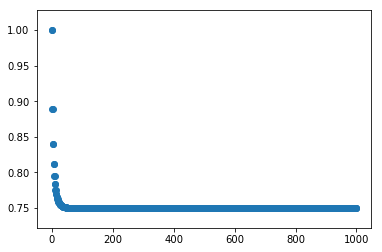

In [31]:
import matplotlib.pyplot as plt
x = [i for i in range(1000)]
y = [prob(x[i]) for i in range(len(x))]
graph = plt.figure()
plt.scatter(x, y)
plt.show()

И посмотрим поближе отрезок N [0, 500], где функция изменяется наиболее существенно:

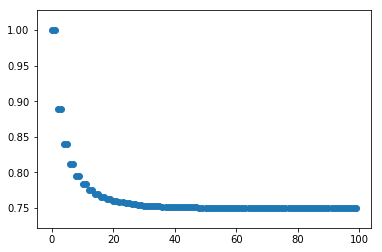

In [32]:
import matplotlib.pyplot as plt
x = [i for i in range(100)]
y = [prob(x[i]) for i in range(len(x))]
graph = plt.figure()
plt.scatter(x, y)
plt.show()